In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

num_classes, num_train, num_test

170500096/170498071 [==============================] - 3s 0us/step


(10, 50000, 10000)

In [3]:
train_features.shape

(50000, 32, 32, 3)

In [4]:
img_rows, img_cols, img_channels

(32, 3, 32)

In [27]:
class_names[np.where(train_labels[0] == 1)[0][0]]

'frog'

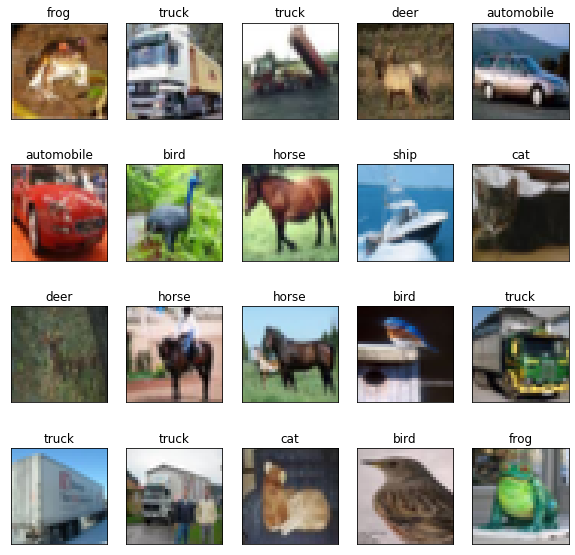

In [32]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10, 10))
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    plt.imshow(train_features[i]);
    ax.set_title(class_names[np.where(train_labels[i] == 1)[0][0]])

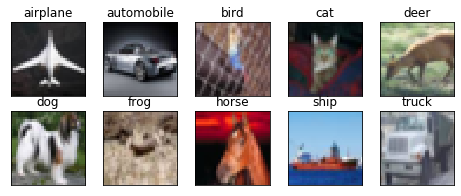

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.layers.convolutional import DepthwiseConv2D, SeparableConvolution2D, SeparableConv2D

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 18s 46ms/step - loss: 1.8613 - acc: 0.2863 - val_loss: 1.4863 - val_acc: 0.4426
Epoch 2/50
390/390 [==============================] - 9s 22ms/step - loss: 1.3658 - acc: 0.5038 - val_loss: 1.1663 - val_acc: 0.5767
Epoch 3/50
390/390 [==============================] - 9s 23ms/step - loss: 1.1348 - acc: 0.5953 - val_loss: 0.9695 - val_acc: 0.6547
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9933 - acc: 0.6516 - val_loss: 0.8656 - val_acc: 0.7014
Epoch 5/50
390/390 [==============================] - 9s 22ms/step - loss: 0.8969 - acc: 0.6891 - val_loss: 0.8063 - val_acc: 0.7164
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8136 - acc: 0.7184 - val_loss: 0.7586 - val_acc: 0.7377
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7602 - acc: 0.7378 - val_loss: 0.7266 - val_acc: 0.7466
Epoch 8/50
390/390 [==============================] - 9s 23m

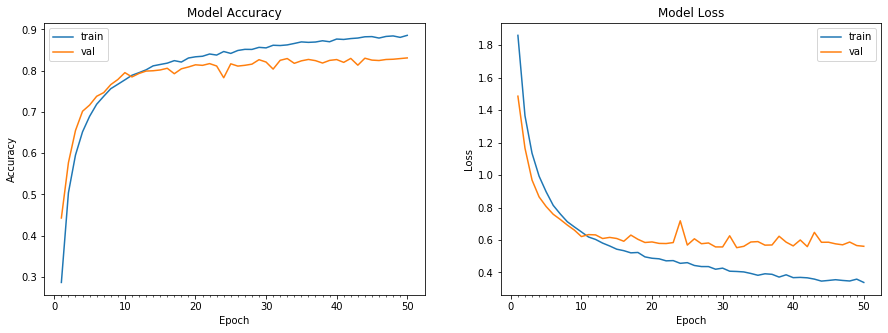

Accuracy on test data is: 83.07


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Accuracy to beat

83.07

### Define the model

1. keeping the parameters less than 100k
2. Using only depth-wise separable convolution

In [0]:
def depthwise_separable_convolution_block(no_of_kernels: int, dropout_val: float = 0.05, depth_multiplier: int = 2):
    model.add(SeparableConv2D(no_of_kernels, 3, border_mode='same', depth_multiplier=depth_multiplier))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_val))


def transition_block(no_of_output_kernels: int):
    model.add(MaxPooling2D())
    model.add(Convolution2D(no_of_output_kernels, 1))
    model.add(Activation('relu'))

In [51]:
model = Sequential()

# initial input block
model.add(SeparableConvolution2D(10, 3, input_shape=(32, 32, 3), border_mode='same', depth_multiplier=2))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

# shape - 32x32x16

depthwise_separable_convolution_block(16) # 32x32x32
depthwise_separable_convolution_block(32) # 32x32x64
depthwise_separable_convolution_block(64) # 32x32x128
depthwise_separable_convolution_block(128) # 32x32x192

transition_block(16) # 16x16x16

depthwise_separable_convolution_block(16) # 16x16x16
depthwise_separable_convolution_block(32) # 16x16x32
depthwise_separable_convolution_block(64) # 16x16x64
depthwise_separable_convolution_block(128) # 16x16x128

transition_block(16) # 8x8x16

depthwise_separable_convolution_block(16) # 8x8x16
depthwise_separable_convolution_block(32) # 8x8x32
depthwise_separable_convolution_block(64) # 8x8x64
depthwise_separable_convolution_block(128) # 8x8x128


model.add(Convolution2D(10, 1)) # 8x8x10
model.add(GlobalAveragePooling2D()) # 10
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(10, 3, input_shape=(32, 32, 3..., depth_multiplier=2, padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(16, 3, depth_multiplier=2, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, 3, depth_multiplier=2, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, 3, depth_multiplier=2, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_53 (Separab (None, 32, 32, 10)        124       
_________________________________________________________________
activation_65 (Activation)   (None, 32, 32, 10)        0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 32, 32, 10)        40        
_________________________________________________________________
dropout_53 (Dropout)         (None, 32, 32, 10)        0         
_________________________________________________________________
separable_conv2d_54 (Separab (None, 32, 32, 16)        516       
_________________________________________________________________
activation_66 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_54 (Batc (None, 32, 32, 16)       

In [0]:
from keras.optimizers import Adam

In [0]:
model.compile(optimizer=Adam(lr=2e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [0]:
# datagen = ImageDataGenerator(rotation_range=0.1, width_shift_range=0.05,
#                              height_shift_range=0.05, zoom_range=0.05, horizontal_flip=True)

datagen = ImageDataGenerator(zoom_range=0.1, rotation_range=0.1, width_shift_range=0.1, 
                             horizontal_flip=True)

reduce_lr = ReduceLROnPlateau(factor=0.6, patience=3, min_lr=1e-6, verbose=1)

### Train the model 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  """


Epoch 1/50
390/390 [==============================] - 105s 268ms/step - loss: 1.5168 - acc: 0.4401 - val_loss: 2.5449 - val_acc: 0.3727
Epoch 2/50
390/390 [==============================] - 98s 250ms/step - loss: 1.1645 - acc: 0.5791 - val_loss: 1.4210 - val_acc: 0.5349
Epoch 3/50
390/390 [==============================] - 97s 249ms/step - loss: 1.0268 - acc: 0.6313 - val_loss: 1.2676 - val_acc: 0.5804
Epoch 4/50
390/390 [==============================] - 97s 249ms/step - loss: 0.9317 - acc: 0.6685 - val_loss: 1.1664 - val_acc: 0.6348
Epoch 5/50
390/390 [==============================] - 97s 248ms/step - loss: 0.8554 - acc: 0.6956 - val_loss: 1.2407 - val_acc: 0.6162
Epoch 6/50
390/390 [==============================] - 98s 250ms/step - loss: 0.8032 - acc: 0.7196 - val_loss: 0.7976 - val_acc: 0.7245
Epoch 7/50
390/390 [==============================] - 98s 250ms/step - loss: 0.7554 - acc: 0.7338 - val_loss: 0.8977 - val_acc: 0.7068
Epoch 8/50
390/390 [==============================] - 

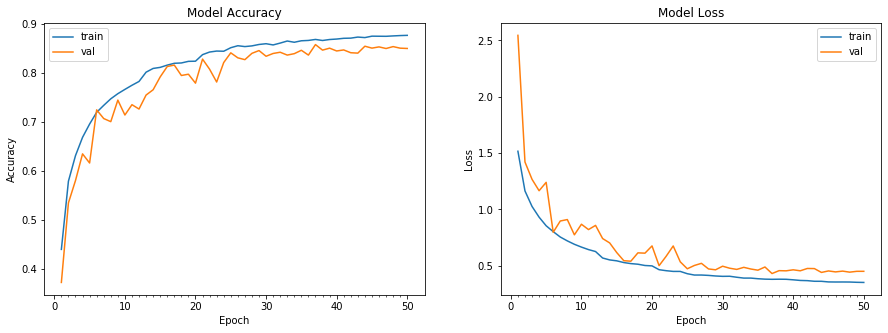

Accuracy on test data is: 84.97


In [56]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[reduce_lr])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))